In [3]:
import numpy as np

""" 
This script generates some (highly synthetic!) expression data with a batch effect 
and uneven population composition between batches.
"""

ncells = 1000  # Number of cells


"""
This simulation involves three cell types/components.
Cells are distributed according to a bivariate normal in a 2-D biological subspace. 
Each cell type has a different x/y center and a different SD.
"""

xmus = [0, 5, 5]
xsds = [1, 0.1, 1]
ymus = [5, 5, 0]
ysds = [1, 0.1, 1]

"""
Note that the different centers should not lie on the same y=mx line; this represents populations that differ only in library size. 
Such differences should not be present in normalized data, and will be eliminated by the cosine normalization step.
The centers above are chosen so as to guarantee good separation between the different components.
"""

prop1 = [0.3, 0.5, 0.2]
comp1 = np.random.choice([1, 2, 3], p=prop1, size=ncells, replace=True)

import numpy as np

"""
Sampling locations for cells in each component.
"""
np.random.seed(0)

samples1 = np.column_stack((np.random.normal(loc=np.array(xmus)[comp1-1], scale=np.array(xsds)[comp1-1], size=ncells),
                            np.random.normal(loc=np.array(ymus)[comp1-1], scale=np.array(ysds)[comp1-1], size=ncells)))



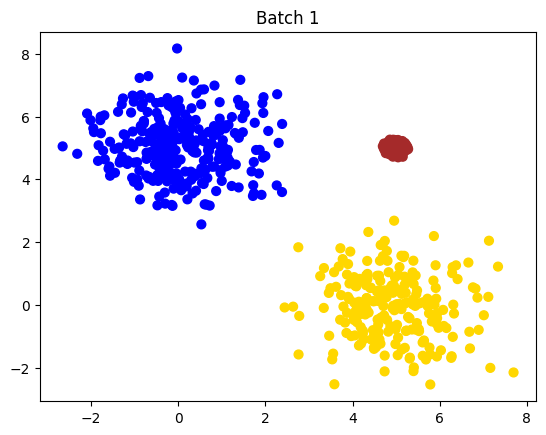

In [5]:
import matplotlib.pyplot as plt

ref_cols = ["blue", "brown", "gold"]
clust1 = [ref_cols[i-1] for i in comp1]

plt.scatter(samples1[:, 0], samples1[:, 1], marker='o', s=40, c=clust1)
plt.title("Batch 1")
plt.show()


In [19]:
import numpy as np

# Random projection to D dimensional space, to mimic high-dimensional expression data.
ngenes = 100
np.random.seed(0)
proj = np.random.normal(size=(ngenes, 2))
A1 = np.dot(samples1, proj.T)

# Add normally distributed noise.
A1 += np.random.normal(size=(ncells, ngenes))
A1 = np.transpose(A1)
row_names = [f"Cell{i+1}-1" for i in range(ncells)]
col_names = [f"Gene{i+1}" for i in range(ngenes)]


In [17]:
A1.shape

(1000, 100)

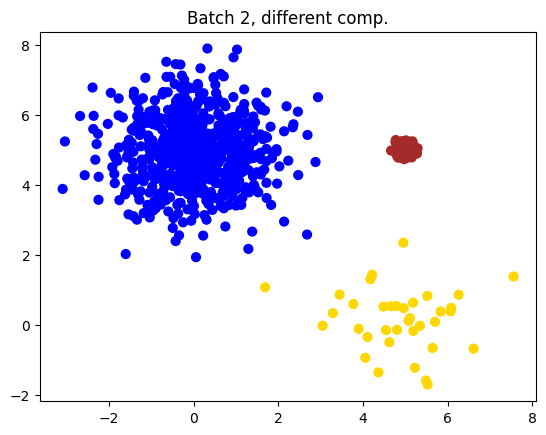

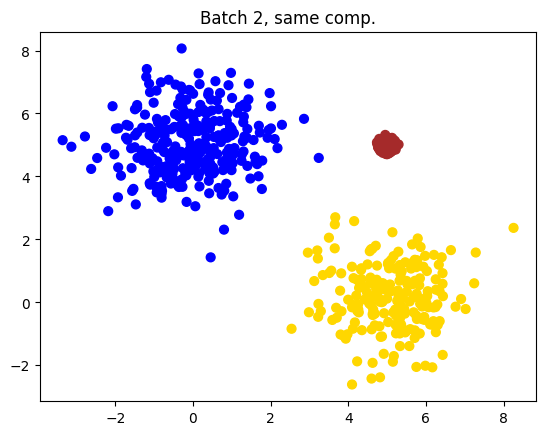

In [24]:
easy_values = [False, True]
prop2 = []
for easy in easy_values:
    if easy:
        prop2 = prop1
    else:
        prop2 = [0.65, 0.3, 0.05]
    
    # Setting proportions of each of the three cell types in batch 2.
    comp2 = np.random.choice([1, 2, 3], p=prop2, size=ncells, replace=True)
    samples2 = np.column_stack((np.random.normal(loc=np.array(xmus)[comp2-1], scale=np.array(xsds)[comp2-1], size=ncells),
                                np.random.normal(loc=np.array(ymus)[comp2-1], scale=np.array(ysds)[comp2-1], size=ncells)))
    ref_cols = ["blue", "brown", "gold"]
    clust2 = [ref_cols[i-1] for i in comp2]

    plt.scatter(samples2[:, 0], samples2[:, 1], marker='o', s=40, c=clust2)
    if easy:
        title = "Batch 2, same comp."
    else:
        title = "Batch 2, different comp."
    plt.title(title)
    plt.show()
    
    A2 = np.dot(samples2, proj.T)

    # Add normally distributed noise.
    A2 += np.random.normal(size=(ncells, ngenes))
    A2 = np.transpose(A2)
    row_names = [f"Cell{i+1}-1" for i in range(ncells)]
    col_names = [f"Gene{i+1}" for i in range(ngenes)]
